In [1]:
import numpy as np
import matplotlib.pyplot as plt
import loadParametersP1
import loadFittingDataP1
from scipy.stats import multivariate_normal
import pdb
import math
import copy
import timeit

In [101]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.autolayout'] = 'true'

In [37]:
class GD(object):
    
    def __init__(self, x0, objective,
                 gradient=None,
                 step_size=0.1):
        self.x0 = x0
        self.objective = objective
        self.gradient = gradient
        self.step_size = step_size
    
    def compute_gradient(self, x, eps=1e-6):
        if self.gradient != None:
            return self.gradient(x)
        grad = np.array([0.0 for i in range(len(x))])
        X = copy.copy(x)
        for i in range(len(x)):
            f_x = self.objective(X)
            #print X, X[i]+eps, self.objective(X), eps
            X[i] = X[i] + eps
            #print X, X[i], self.objective(X)
            f_eps = self.objective(X)
            X[i] = X[i] - eps
            grad[i] = (f_eps-f_x)/eps
        return grad
        
    
    def step(self, gtol=1e-8):
        log = []
        t = 0
        while True:
            grad = self.compute_gradient(self.x0)
            log.append((self.x0, np.linalg.norm(grad)))
            if np.linalg.norm(grad) < gtol:
                print "Gradient Convergence"
                break
            self.x0 = self.x0 - self.step_size * grad
            t += 1
            if np.linalg.norm(self.x0) > 900:
                break
        return log

In [4]:
gaussMean,gaussCov,quadBowlA,quadBowlb = loadParametersP1.getData()

In [5]:
test_gauss = lambda x : -multivariate_normal.pdf(x, gaussMean, gaussCov)
test_gauss_gradient = lambda x : -test_gauss(x)*np.linalg.inv(gaussCov).dot(x-gaussMean)

In [6]:
test_bowl = lambda x : 0.5*x.T.dot(quadBowlA.dot(x)) - x.T.dot(quadBowlb)
test_bowl_gradient = lambda x : quadBowlA.dot(x) - quadBowlb

In [7]:
x0 = np.array([6.0, 16.0])
log = GD(x0, test_gauss, None, 10000).step()

Gradient Convergence


In [19]:
def g_log(x0, step_size, gtol):
    return GD(x0, test_gauss, test_gauss_gradient, step_size).step(gtol)
def q_log(x0, step_size, gtol, num=False):
    if num:
        return GD(x0, test_bowl, None, step_size).step(gtol)
    return GD(x0, test_bowl, test_bowl_gradient, step_size).step(gtol)

In [9]:
def plot_grad_conv(log):
    X = range(len(log))
    Y = [val[1] for val in log]
    plt.plot(X, Y)
    plt.show()
    plt.close()


Gradient Convergence
Gradient Convergence
Gradient Convergence
Gradient Convergence
Gradient Convergence


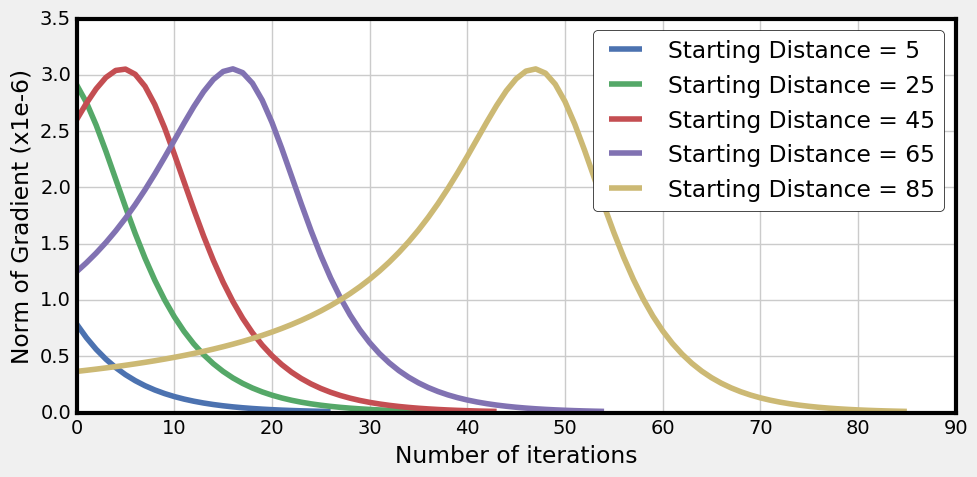

In [14]:
minima = np.array([10.0,10.0])
start_point = [np.array([10.0,15.0+i*20]) for i in range(5)]
log = [g_log(start_point[i], 1e6, 1e-8) for i in range(5)]
X = [range(len(log[i])) for i in range(len(log))]
Y = [[val[1]*1e6 for val in log[i]] for i in range(len(log))]
plt.figure(figsize=(10,5))
for i in range(len(log)):
    dist = int(np.linalg.norm(start_point[i]-minima))
    plt.plot(X[i], Y[i], label='Starting Distance = '+str(dist))
    plt.xlabel('Number of iterations')
    plt.ylabel('Norm of Gradient (x1e-6)')
    plt.legend()
plt.show()
plt.close()

Gradient Convergence
Gradient Convergence
Gradient Convergence
Gradient Convergence
Gradient Convergence


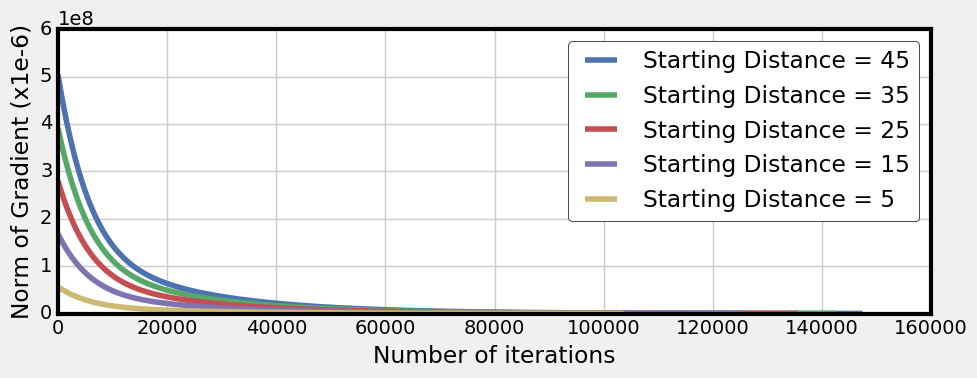

In [15]:
minima = np.array([26.67,26.67])
start_point = [np.array([26.67,31.7+i*10]) for i in range(5)]
log = [q_log(start_point[i], 1e-5, 1e-1) for i in range(len(start_point))]
X = [range(len(log[i])) for i in range(len(log))]
Y = [[val[1]*1e6 for val in log[i]] for i in range(len(log))]
plt.figure(figsize=(10,4))
for idx in range(len(log)):
    i = len(log)-1-idx
    dist = int(np.linalg.norm(start_point[i]-log[i][-1][0]))
    plt.plot(X[i], Y[i], label='Starting Distance = '+str(dist))
    plt.xlabel('Number of iterations')
    plt.ylabel('Norm of Gradient (x1e-6)')
    plt.legend()
plt.show()
plt.close()

In [40]:
q_log(start, 0.001, 1e-1, True)

Gradient Convergence


[(array([ 35.,  35.]), 176.77670369307936),
 (array([ 34.87499999,  34.87499999]), 174.12505365217106),
 (array([ 34.75187499,  34.75187499]), 171.51317867056915),
 (array([ 34.63059686,  34.63059686]), 168.9404819423132),
 (array([ 34.5111379,  34.5111379]), 166.40637180632189),
 (array([ 34.39347082,  34.39347082]), 163.91027718102967),
 (array([ 34.27756875,  34.27756875]), 161.45162183999207),
 (array([ 34.16340522,  34.16340522]), 159.02985013628046),
 (array([ 34.05095413,  34.05095413]), 156.64440127808729),
 (array([ 33.94018981,  33.94018981]), 154.29474019799977),
 (array([ 33.83108696,  33.83108696]), 151.98031639396831),
 (array([ 33.72362064,  33.72362064]), 149.70061023321708),
 (array([ 33.61776633,  33.61776633]), 147.45510208297023),
 (array([ 33.51349982,  33.51349982]), 145.24327745533088),
 (array([ 33.41079732,  33.41079732]), 143.06462700728119),
 (array([ 33.30963535,  33.30963535]), 140.91865683044011),
 (array([ 33.20999081,  33.20999081]), 138.80487816130568),

Gradient Convergence


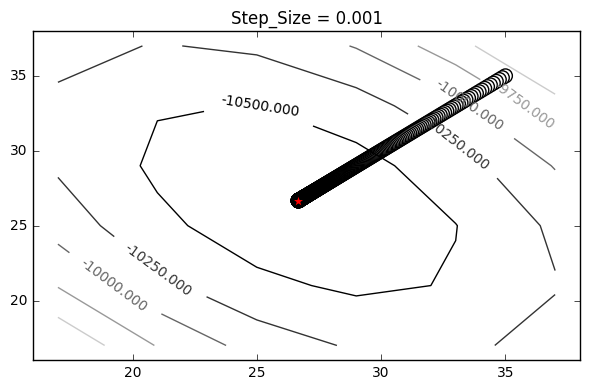

In [72]:
plt.figure()

step_size = 0.001

start = np.array([35.0,35.0])
diverge_log = q_log(start, step_size, 1e-1, True)
X = [l[0][0] for l in diverge_log]
Y = [l[0][1] for l in diverge_log]
min_x = min(min(X), 17)
max_x = max(max(X), 40)
min_y = min(min(Y), 17)
max_y = max(max(Y), 40)
color = [str(i*255./len(Y)) for i in range(len(Y))]
color.reverse()
plt.scatter(X,Y, c=color, s=100, cmap='gray')
plt.scatter([26.67],[26.67], c='r', s=100, marker='*')
delta = 4.0

low, up = -600,600
x = np.arange(min_x, max_x, delta)
y = np.arange(min_y, max_y, delta)
X, Y = np.meshgrid(x, y)
Z = [[test_bowl(np.array([X[i][j],Y[i][j]])) for j in range(len(X[i]))] for i in range(len(X))]
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Step_Size = '+str(step_size))

plt.show()

In [166]:
step_sizes = np.linspace(10**-6.0, 10**-1.0, 30)
start_point = [26.67,31.7]
log_ss = []
for ss in step_sizes:
    log_ss.append(q_log(start_point, ss, 1e-1))

KeyboardInterrupt: 

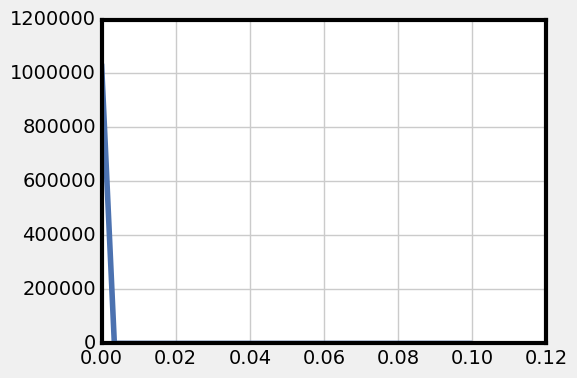

array([  1.00000000e-06,   3.44924138e-03,   6.89748276e-03,
         1.03457241e-02,   1.37939655e-02,   1.72422069e-02,
         2.06904483e-02,   2.41386897e-02,   2.75869310e-02,
         3.10351724e-02,   3.44834138e-02,   3.79316552e-02,
         4.13798966e-02,   4.48281379e-02,   4.82763793e-02,
         5.17246207e-02,   5.51728621e-02,   5.86211034e-02,
         6.20693448e-02,   6.55175862e-02,   6.89658276e-02,
         7.24140690e-02,   7.58623103e-02,   7.93105517e-02,
         8.27587931e-02,   8.62070345e-02,   8.96552759e-02,
         9.31035172e-02,   9.65517586e-02,   1.00000000e-01])

In [89]:
n_iters_ss = np.array([len(log) for log in log_ss])
plt.plot(step_sizes, n_iters_ss)
plt.show()
step_sizes

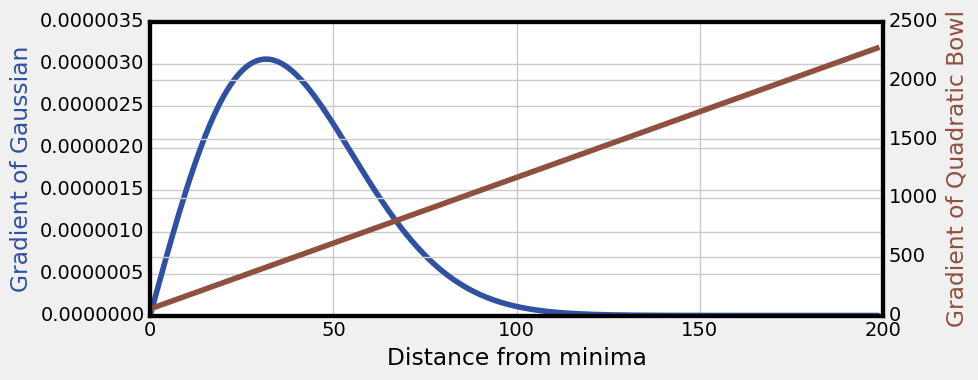

In [129]:
X = range(200)
blue = '#3050A0'
red = '#905040'
pts_quad = [np.array([26.67,31.7+i]) for i in X]
pts_gauss = [np.array([10.0,10.0+i]) for i in X]
Y_quad = [np.linalg.norm(test_bowl_gradient(pts_quad[i])) for i in range(len(X))]
Y_gauss = [np.linalg.norm(test_gauss_gradient(pts_gauss[i])) for i in range(len(X))]
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 4)
ax1.plot(X,Y_gauss, c=blue)
ax1.set_ylabel('Gradient of Gaussian', color=blue)
ax2 = ax1.twinx()
ax2.plot(X,Y_quad, c=red)
ax2.set_ylabel('Gradient of Quadratic Bowl', color=red)
ax1.set_xlabel('Distance from minima')
plt.show()
plt.close()

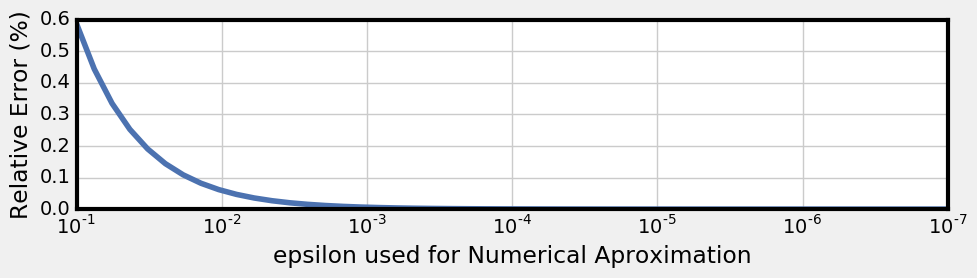

In [243]:
def deviation_num_grad(eps):
    pts = [np.array([10.0,11.0+i]) for i in range(200)]
    grad = [test_gauss_gradient(x) for x in pts]
    numeric_grad = [GD(x0, test_gauss).compute_gradient(x, eps) for x in pts]
    return 100*np.mean([np.linalg.norm(numeric_grad[i]-grad[i])/np.linalg.norm(grad[i]) for i in range(len(grad))])

X = 10.0**np.linspace(-1.0, -7.0, 50)
Y = [deviation_num_grad(eps) for eps in X]
b
plt.semilogx(X, Y)
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('epsilon used for Numerical Aproximation')
plt.ylabel('Relative Error (%)')
plt.show()
plt.close()

In [226]:
Y

[0.44784024072894646,
 0.44784024072894646,
 0.44784024072894646,
 0.44784024072894646,
 0.44784024072894646,
 0.44784024072894646,
 0.44784024072894646,
 0.44784024072894646,
 0.44784024072894646]

In [62]:
log[-1][0]

array([  10.        , -207.43309004])

In [75]:
X,y = loadFittingDataP1.getData()

In [84]:
class SGD(object):
    
    def __init__(self, X, y,
                 step_size=1e-5):
        self.X = X
        self.y = y
        self.step_size = step_size
    
    def compute_objective(self, theta, idx = None):
        if idx == None:
            idx = range(len(self.y))
        return sum([(theta.dot(X[i])-y[i])**2 for i in idx])
    
    def compute_numerical_gradient(self, theta, eps=1e-7, idx=None):
        grad = np.zeros(len(theta))
        for i in range(len(theta)):
            if idx != None and i != idx:
                continue
            f = self.compute_objective(theta)
            theta[i] = theta[i] + eps
            f_eps = self.compute_objective(theta)
            theta[i] = theta[i] - eps
            grad[i] = (f_eps-f)/eps
        return grad
        
    def compute_gradient(self, theta, idx=None):
        if idx == None:
            idx = range(len(self.y))
        grad = np.zeros(self.X.shape[1])
        for i in idx:
            grad += 2 * (self.X[i].dot(theta) - self.y[i]) * self.X[i]
        return grad*len(self.y)*1.0/len(idx)
    
    def line_search(self, theta, search_dir, step_size=1e-6, idx=None):
        best_val = self.compute_objective(theta-step_size*search_dir)
        while True:
            new_val = self.compute_objective(theta-2.0*step_size*search_dir, idx)
            if new_val < best_val:
                step_size *= 2.0
                best_val = new_val
            else:
                break
        while step_size > 1e-9:
            new_val = self.compute_objective(theta-0.5*step_size*search_dir, idx)
            if new_val < best_val:
                step_size *= 0.5
                best_val = new_val
            else:
                break
        return step_size
    
    def step(self, theta, stochastic=False, minibatch_size=1, ftol=1e1, gtol=1e3):
        log = []
        idx = None
        prev_objective = self.compute_objective(theta)
        beta = 0.8
        t = 0.0
        t0 = 1e6
        k = 1.0
        step_size = 1e-6
        while True:
            if stochastic:
                idx = np.random.choice(self.X.shape[0], minibatch_size, replace=False)
            
            grad = self.compute_gradient(theta, idx)
            
            #step_size = self.line_search(theta, grad, step_size)

            step_size = (t0+10000*t)**-k
            #step_size = 1e-6
            
            theta = theta - step_size * grad
            
            tmp = self.compute_objective(theta)
            log.append((theta, tmp, grad))
            
            if abs(prev_objective-tmp) < ftol*step_size:
                print "function convergence"
                print minibatch_size, len(log), log[-1][1]
                break
            if t%10 == 0 and np.linalg.norm(self.compute_gradient(theta)) < gtol:
                print "gradient convergence"
                print minibatch_size, len(log), log[-1][1]
                break
            
            prev_objective = tmp
            t += 1.0
            if t%10000 == 0:
                print log[-1][1], np.linalg.norm(self.compute_gradient(theta))
                print "step size", step_size
            #if t > 10000:
            #    break
        return log

In [85]:
optimizer = SGD(X,y)

In [78]:
#log_fixed_step = optimizer.step(copy.copy(theta_0), stochastic=True, minibatch_size=100)

In [86]:
theta_0 = (np.random.random(X.shape[1])-0.5)*0.3+0.5 * theta_opt

In [89]:
batch_sizes = [1,2,3,5,10,20,30,40,50,60,70,80,90,100]
logs = []
line_search_times =[]
for bs in batch_sizes[:]:
    start = timeit.timeit()
    log = optimizer.step(copy.copy(theta_0), stochastic=True, minibatch_size=bs);
    end = timeit.timeit()
    line_search_times.append(end-start)
    logs.append(log)

8355.62829313 1930.14138895
step size 9.90197049213e-09
8351.68691455 1652.55027598
step size 4.97537190905e-09
8348.09426831 1684.22426543
step size 3.32236951394e-09
gradient convergence
1 36271 8338.50661606
gradient convergence
2 9701 8339.59930237
gradient convergence
3 4281 8338.33429842
gradient convergence
5 7601 8339.73007554
gradient convergence
10 2331 8338.94343907
gradient convergence
20 931 8339.31862895
gradient convergence
30 471 8336.71344682
gradient convergence
40 441 8338.97889192
gradient convergence
50 401 8339.08898389
gradient convergence
60 211 8340.61580283
gradient convergence
70 221 8340.63632316
gradient convergence
80 231 8340.01511242
gradient convergence
90 211 8342.36338176
gradient convergence
100 211 8342.51363571


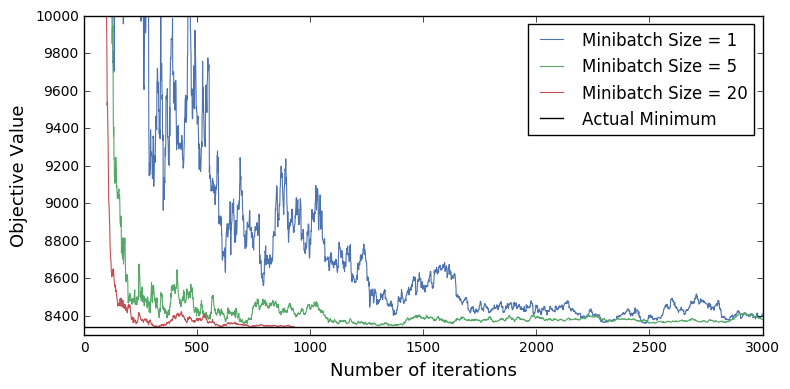

In [97]:
def plot_log(log, label='', line_w=0.8):
    for i in range(len(log)):
        if log[i][1] < 2e4:
            idx = i
            break
    X = range(0,min(3000,len(log)))
    Y = [log[i][1] for i in X]
    plt.xlabel('Number of iterations', fontsize=13)
    plt.ylabel('Objective Value', fontsize=13)
    plt.plot(X,Y, linewidth=line_w, label=label)

plt.figure(figsize=(8,4))
    
for i in [0,3,5]:
    plot_log(logs[i], 'Minibatch Size = '+str(batch_sizes[i]))

#plot_log(log_fixed_step, 'Batch Bradient Descent w/Fixed Step', 2.0)

plt.axhline(y=8340, linewidth=1, color='k', label='Actual Minimum')
axes = plt.gca()
axes.set_ylim([8300,1e4])
plt.legend()
plt.show()
plt.close()

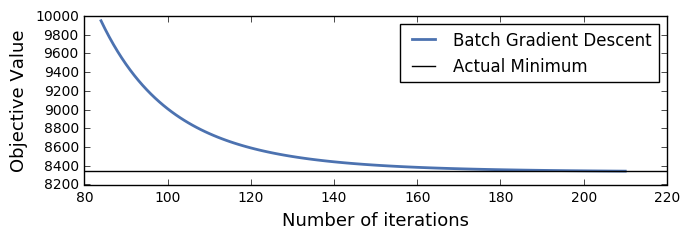

In [67]:
plt.figure(figsize=(7,2.5))

plot_log(logs[-1], 'Batch Gradient Descent', 2.0)
plt.axhline(y=8340, linewidth=1, color='k', label='Actual Minimum')
plt.legend()
plt.show()
plt.close()

In [62]:
logs[-1][-1][0]

array([  0.50807964,  -2.33892916,  -6.31160121,   6.80799317,
        -1.06433962,   6.66524555,   3.39681102,  -0.45908266,
       -12.94348691,  15.73147536])

In [91]:
zip(batch_sizes, [len(logs[i]) for i in range(len(logs))], [batch_sizes[i]*len(logs[i]) for i in range(len(logs))])

[(1, 36271, 36271),
 (2, 9701, 19402),
 (3, 4281, 12843),
 (5, 7601, 38005),
 (10, 2331, 23310),
 (20, 931, 18620),
 (30, 471, 14130),
 (40, 441, 17640),
 (50, 401, 20050),
 (60, 211, 12660),
 (70, 221, 15470),
 (80, 231, 18480),
 (90, 211, 18990),
 (100, 211, 21100)]

In [80]:
X_dagger = np.linalg.inv(X.T.dot(X)).dot(X.T)
theta_opt = X_dagger.dot(y)
optimizer.compute_objective(X_dagger.dot(y))

8333.2142111780468

In [28]:
multiplier = (np.random.random(X.shape[1])-0.5)*0.3 + 1.0
theta_0 = theta_opt * multiplier

In [213]:
theta_opt

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [363]:
def plot_between(objective, x_init, x_fin, num_points=100):
    delta = (x_fin-x_init)*1.0/num_points
    Y = [objective(x_init+inc*delta) for inc in range(num_points)]
    X = range(num_points)
    plt.plot(X, Y)
    plt.show()

In [244]:
theta_f = log[-1][0]
plot_between(lambda x : np.linalg.norm(optimizer.compute_gradient(x)), theta_opt, theta_f)

NameError: name 'plot_between' is not defined

In [382]:
i = 4
optimizer.compute_gradient(log[i][0]), log[i][2]

(array([  8311.00379736,  -6303.23806128,   4641.88427008,  11738.62258249,
         -3975.54611993, -12293.00909497,   -444.70177102,   3095.53510349,
        -41155.08359393, -10825.80731474]),
 array([ -6.94641045e+02,   5.01079450e+02,  -3.05062766e-01,
         -8.70606809e+02,   1.05962171e+03,  -5.61088238e+02,
          1.15071085e+02,  -3.59485225e+02,  -2.02486864e+02,
         -7.44127169e+02]))

In [449]:
i = -1
thet = log[i][0]
print thet
optimizer.line_search(thet, optimizer.compute_gradient(thet, range(10)))

[  0.50181736  -2.58834409  -6.1516979    6.95069716  -1.13915394
   6.76637621   3.5158918   -0.49299479 -12.95368354  15.89744673]


9.765625e-10

In [453]:
X.shape[0]

100